
### https://huggingface.co/datasets/Lichess/chess-position-evaluations

232,637,106 chess positions evaluated with Stockfish at various depths and node count. Produced by, and for, the Lichess analysis board, running various flavours of Stockfish within user browsers. This version of the dataset is a de-normalized version of the original dataset and contains 548,822,600 rows.

One row of the dataset looks like this:
```
{
  "fen": "2bq1rk1/pr3ppn/1p2p3/7P/2pP1B1P/2P5/PPQ2PB1/R3R1K1 w - -",
  "line": "g2e4 f7f5 e4b7 c8b7 f2f3 b7f3 e1e6 d8h4 c2h2 h4g4",
  "depth": 36,
  "knodes": 206765,
  "cp": 311,
  "mate": None
}
fen: string, the position FEN only contains pieces, active color, castling rights, and en passant square.
line: string, the principal variation, in UCI format.
depth: string, the depth reached by the engine.
knodes: int, the number of kilo-nodes searched by the engine.
cp: int, the position's centipawn evaluation. This is None if mate is certain.
mate: int, the position's mate evaluation. This is None if mate is not certain.
```

In [1]:
from datasets import load_dataset

In [12]:
ds_pos_full = load_dataset("Lichess/chess-position-evaluations", streaming=True)
ds_pos = ds_pos_full["train"].take(1000)

Resolving data files:   0%|          | 0/17 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/17 [00:00<?, ?it/s]

In [ ]:
print(ds_pos)
for i, example in enumerate(ds_pos):
    print(example)
    print("fen:", example['fen'])
    print("line:", example['line'])
    print("centi-pawn:", example['cp'])
    print("mate:", example['mate'])
    if i >= 2:  # Limit to 10 examples
        break

IterableDataset({
    features: ['fen', 'line', 'depth', 'knodes', 'cp', 'mate'],
    num_shards: 17
})
{'fen': '7r/1p3k2/p1bPR3/5p2/2B2P1p/8/PP4P1/3K4 b - -', 'line': 'f7g7 e6e2 h8d8 e2d2 b7b5 c4b3 g7f6 d1e1 a6a5 a2a3', 'depth': 46, 'knodes': 4189972, 'cp': 69, 'mate': None}
fen: 7r/1p3k2/p1bPR3/5p2/2B2P1p/8/PP4P1/3K4 b - -
line: f7g7 e6e2 h8d8 e2d2 b7b5 c4b3 g7f6 d1e1 a6a5 a2a3
centi-pawn: 69
mate: None
{'fen': '7r/1p3k2/p1bPR3/5p2/2B2P1p/8/PP4P1/3K4 b - -', 'line': 'h8d8 d1e1 a6a5 a2a3 c6d7 e6e7 f7f6 e1f2 b7b5 c4b3', 'depth': 46, 'knodes': 4189972, 'cp': 163, 'mate': None}
fen: 7r/1p3k2/p1bPR3/5p2/2B2P1p/8/PP4P1/3K4 b - -
line: h8d8 d1e1 a6a5 a2a3 c6d7 e6e7 f7f6 e1f2 b7b5 c4b3
centi-pawn: 163
mate: None
{'fen': '7r/1p3k2/p1bPR3/5p2/2B2P1p/8/PP4P1/3K4 b - -', 'line': 'h8a8 d1e1 a6a5 e6h6 f7g7 h6h4 a8d8 c4d3 c6g2 d3f5', 'depth': 46, 'knodes': 4189972, 'cp': 229, 'mate': None}
fen: 7r/1p3k2/p1bPR3/5p2/2B2P1p/8/PP4P1/3K4 b - -
line: h8a8 d1e1 a6a5 e6h6 f7g7 h6h4 a8d8 c4d3 c6g2 d3f5
cent

In [14]:
# find rows with a mate
found = 0
for i, example in enumerate(ds_pos):
    if example['mate'] is not None and example['mate'] > 17:
        found += 1
        print("Found mate in position:", example['fen'])
        print("mate:", example['mate'])
        print("centi-pawn:", example['cp'])
    if found >= 5:  # Limit to 10 examples
        break

Found mate in position: 6k1/6p1/8/4K3/4NN2/8/8/8 w - -
mate: 20
centi-pawn: None
Found mate in position: 6k1/6p1/8/4K3/4NN2/8/8/8 w - -
mate: 24
centi-pawn: None
Found mate in position: 6k1/6p1/8/4K3/4NN2/8/8/8 w - -
mate: 18
centi-pawn: None
Found mate in position: 6k1/6p1/8/4K3/4NN2/8/8/8 w - -
mate: 20
centi-pawn: None
Found mate in position: 6k1/6p1/8/4K3/4NN2/8/8/8 w - -
mate: 24
centi-pawn: None


Samples with cp: 8705
Samples with mate: 1295
Fraction with mate: 0.130
Mate samples with |mate| > 15: 228
Fraction of mate samples with |mate| > 15: 0.176
Mate samples with |mate| > 20: 96
Fraction of mate samples with |mate| > 20: 0.074


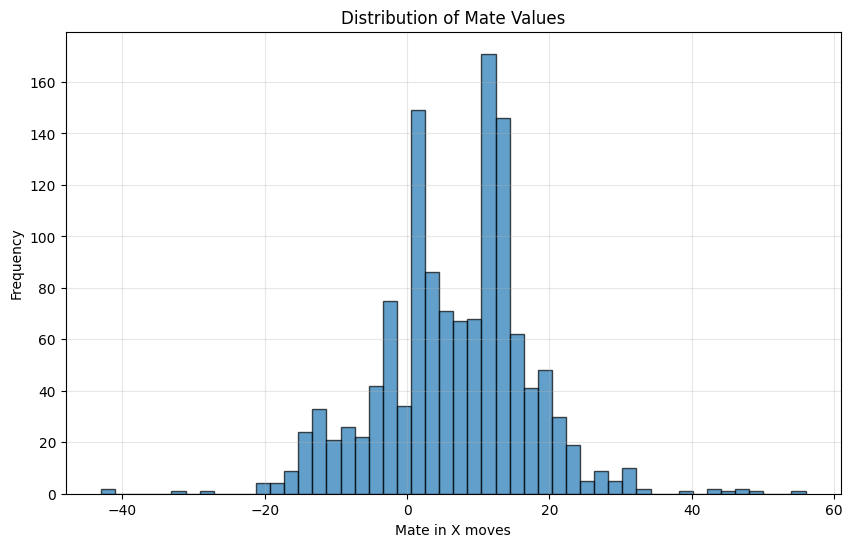

In [17]:
import matplotlib.pyplot as plt

# Reset ds_pos to iterate from the beginning
ds_pos = ds_pos_full["train"].take(10000)

cp_count = 0
mate_count = 0
mate_values = []
for example in ds_pos:
    if example['cp'] is not None:
        cp_count += 1
    if example['mate'] is not None:
        mate_count += 1
        mate_values.append(example['mate'])

print(f"Samples with cp: {cp_count}")
print(f"Samples with mate: {mate_count}")
print(f"Fraction with mate: {mate_count / (cp_count + mate_count):.3f}")

# Calculate fraction of mate samples where abs value > 15
mate_abs_gt_10 = sum(1 for mate in mate_values if abs(mate) > 15)
print(f"Mate samples with |mate| > 15: {mate_abs_gt_10}")
print(f"Fraction of mate samples with |mate| > 15: {mate_abs_gt_10 / mate_count:.3f}")

# Calculate fraction of mate samples where abs value > 20
mate_abs_gt_20 = sum(1 for mate in mate_values if abs(mate) > 20)
print(f"Mate samples with |mate| > 20: {mate_abs_gt_20}")
print(f"Fraction of mate samples with |mate| > 20: {mate_abs_gt_20 / mate_count:.3f}")

# Draw histogram of mate values
if mate_values:
    plt.figure(figsize=(10, 6))
    plt.hist(mate_values, bins=50, alpha=0.7, edgecolor='black')
    plt.xlabel('Mate in X moves')
    plt.ylabel('Frequency')
    plt.title('Distribution of Mate Values')
    plt.grid(True, alpha=0.3)
    plt.show()
else:
    print("No mate values found to plot")

In [6]:
# Look for rows that have both mate and cp scores
ds_pos = ds_pos_full["train"].take(10000)

both_count = 0
cp_values = []
for example in ds_pos:
    if example['cp'] is not None:
        cp_values.append(example['cp'])
    if example['mate'] is not None and example['cp'] is not None:
        both_count += 1
        if both_count <= 5:  # Show first 5 examples
            print(f"Row {both_count}:")
            print(f"  FEN: {example['fen']}")
            print(f"  CP: {example['cp']}")
            print(f"  Mate: {example['mate']}")
            print()

print(f"Total rows with both mate and cp: {both_count}")
if both_count > 0:
    print(f"Fraction of total samples: {both_count / 10000:.4f}")

# Find max and min cp scores
if cp_values:
    max_cp = max(cp_values)
    min_cp = min(cp_values)
    print(f"\nCP score statistics:")
    print(f"Max CP: {max_cp}")
    print(f"Min CP: {min_cp}")
    print(f"Range: {max_cp - min_cp}")
else:
    print("No CP values found")

Total rows with both mate and cp: 0

CP score statistics:
Max CP: 20000
Min CP: -9605
Range: 29605


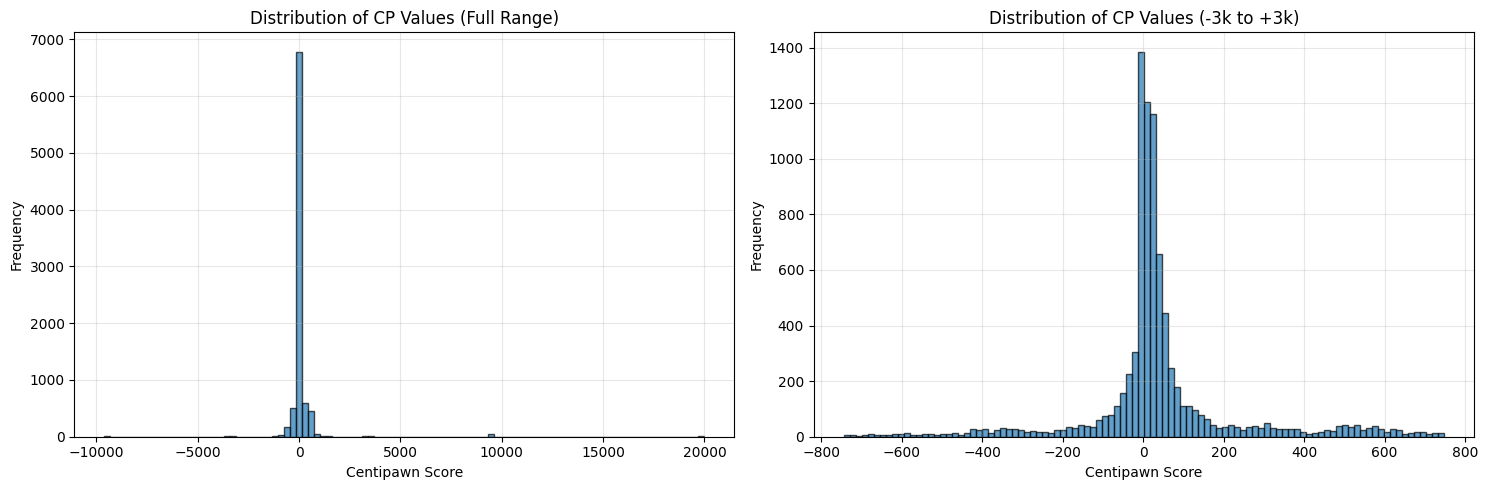

Total CP values: 8705
CP values in [-3000, 3000] range: 8523
Fraction within range: 0.979


In [11]:
from matplotlib import pyplot as plt
# Draw histogram of cp values with full extent
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.hist(cp_values, bins=100, alpha=0.7, edgecolor='black')
plt.xlabel('Centipawn Score')
plt.ylabel('Frequency')
plt.title('Distribution of CP Values (Full Range)')
plt.grid(True, alpha=0.3)

cap_value = 750
plt.subplot(1, 2, 2)
capped_cp_values = [cp for cp in cp_values if -cap_value <= cp <= cap_value]
plt.hist(capped_cp_values, bins=100, alpha=0.7, edgecolor='black')
plt.xlabel('Centipawn Score')
plt.ylabel('Frequency')
plt.title('Distribution of CP Values (-3k to +3k)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Total CP values: {len(cp_values)}")
print(f"CP values in [-3000, 3000] range: {len(capped_cp_values)}")
print(f"Fraction within range: {len(capped_cp_values) / len(cp_values):.3f}")

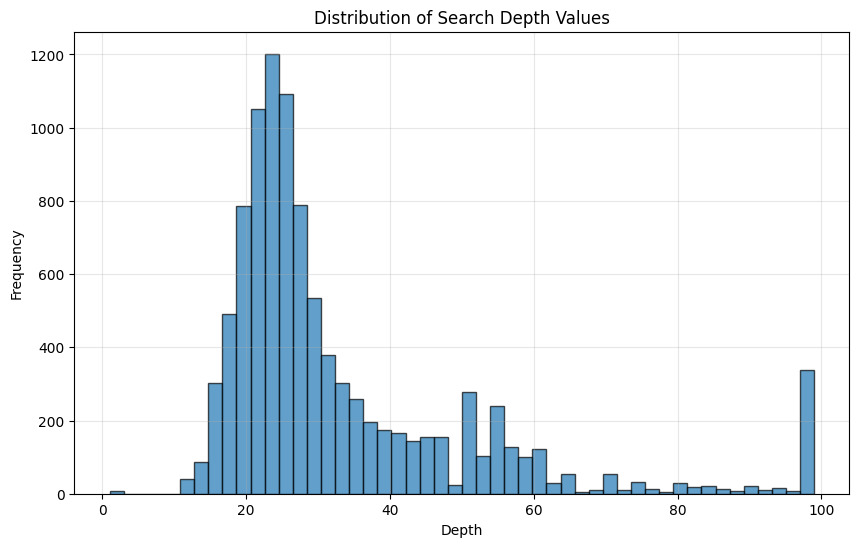

Total depth values: 10000
Min depth: 1
Max depth: 99
Average depth: 33.42


In [15]:
# Reset ds_pos to iterate from the beginning and collect depth values
ds_pos = ds_pos_full["train"].take(10000)

depth_values = []
for example in ds_pos:
    if example['depth'] is not None:
        depth_values.append(example['depth'])

# Plot histogram of depth values
plt.figure(figsize=(10, 6))
plt.hist(depth_values, bins=50, alpha=0.7, edgecolor='black')
plt.xlabel('Depth')
plt.ylabel('Frequency')
plt.title('Distribution of Search Depth Values')
plt.grid(True, alpha=0.3)
plt.show()

print(f"Total depth values: {len(depth_values)}")
if depth_values:
    print(f"Min depth: {min(depth_values)}")
    print(f"Max depth: {max(depth_values)}")
    print(f"Average depth: {sum(depth_values) / len(depth_values):.2f}")

# backup dataset

In [ ]:

ds_games_full = load_dataset("Lichess/standard-chess-games", streaming=True)
ds_games = ds_games_full["train"].take(1000)

In [40]:
print(ds_games)
"""
About 6% of the games include Stockfish analysis evaluations: 
[%eval 2.35] (235 centipawn advantage), 
[%eval #-4] (getting mated in 4), 
always from White's point of view.
"""
found = 0
for i, example in enumerate(ds_games):
    # print(example)
    if 'eval' in example['movetext']:
        print(example['movetext'])
        found += 1
    if found > 4:  # Limit to 10 examples
        break

IterableDataset({
    features: ['Event', 'Site', 'White', 'Black', 'Result', 'WhiteTitle', 'BlackTitle', 'WhiteElo', 'BlackElo', 'WhiteRatingDiff', 'BlackRatingDiff', 'UTCDate', 'UTCTime', 'ECO', 'Opening', 'Termination', 'TimeControl', 'movetext'],
    num_shards: 25812
})
1. e4 { [%eval 0.2] } 1... e6 { [%eval 0.13] } 2. Bc4 { [%eval -0.31] } 2... d5 { [%eval -0.28] } 3. exd5 { [%eval -0.37] } 3... exd5 { [%eval -0.31] } 4. Bb3 { [%eval -0.33] } 4... Nf6 { [%eval -0.35] } 5. d4 { [%eval -0.34] } 5... Be7 { [%eval 0.0] } 6. Nf3 { [%eval 0.0] } 6... O-O { [%eval -0.08] } 7. Bg5 { [%eval -0.19] } 7... h6 { [%eval -0.29] } 8. Bxf6 { [%eval -0.36] } 8... Bxf6 { [%eval -0.37] } 9. O-O { [%eval -0.36] } 9... c6 { [%eval -0.12] } 10. Re1 { [%eval -0.17] } 10... Bf5 { [%eval -0.04] } 11. c4?! { [%eval -0.67] } 11... dxc4 { [%eval -0.5] } 12. Bxc4 { [%eval -0.77] } 12... Nd7?! { [%eval -0.1] } 13. Nc3 { [%eval 0.0] } 13... Nb6 { [%eval 0.0] } 14. b3?! { [%eval -0.76] } 14... Nxc4 { [%eval -0.

ok so the positions dataset seems more directly easy to work with:
I have the board state in fen, the centipawn score, and the next move (line).
However, it doesn't have the previous move, if I wanted to use that as a feature.

the games dataset has the previous move as well, but is a little harder to work with:
- I'd need to filter down to games that have evaluations
- I'd need to reconstruct the game board by building up the moves.

I think for now I'm going to use the positions dataset, and I can always come back
and add the other feature later.